# Computer Vision and Deep Learning - Laboratory 3 

Starting from this session, we'll be diving into deep convolutional neural networks and we'll start using _pytorch_ a popular machine learning library developed by Meta AI.

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


import torch
import torchvision
import torchvision.transforms as transforms

# <font color='red'>!! IMPORTANT !! Project</font>  

By the end of this week you need to choose a project theme. Please fill in the name of the students and the project theme in [this](https://docs.google.com/spreadsheets/d/1fyHSRn4ZN2M1x-yH_TVnEtMfdZi4AP1ow5DdEoKHogw/edit?usp=sharing) document. 

Rubric:
- baseline model (2p)
- training and evaluation (3p)
- your own contribution (2p)
- written report (2p) <font color='red'>*The report is mandatory. You won't be graded if you don't submit the report*</font>. You can use [this](https://www.overleaf.com/latex/templates/cvpr-2022-author-kit/qbmjsdxryffn) overleaf template. The report should have at least 3 pages and at most 9 pages (excluding references).
  - context, problem motivation
  - state of the art
  - proposed solution
  - experiments (describe experimental setup, datasets, explain the metrics that you used to evaluate your model and why you chose them, hyper-parameter tuning)
  - comparison between the developed models (and with state of the art)
  - conclusions
- default (1p)


You might find these links useful:
- [a "recipe" ](http://karpathy.github.io/2019/04/25/recipe/)  when you will start training the models for your project.
- [model debugging](https://developers.google.com/machine-learning/testing-debugging/common/overview)


# Warm-up
 
 
Let's start by implementing the basic blocks of a convolutional neural network: the convolutional and the pooling operations. Perhaps this would be the last "low-level" implementation that you'll do for this laboratory.
 
## Convolutions
 
The convolutional layer is the main building block of a convolutional neural network. These layers contain a set of learnable filters, which will learn which features are relevant for the classification problem based on the training data.
During the forward pass, each filter (which __must__ have the same depth as the input volume) is slided over the spatial dimensions of the input volume and we compute an element-wise multiplication between the filter weights and the region of interest in the input volume that lies beneath the filter.
 
The hyperparameters of a convolutional layer are:
- the filter size F (usually this is an odd value);
- the padding amount which will be added to the input volume P;
- the stride S (or the step used when sliding across the input volume);
- the number of filters k; the depth of each filter must match the depth of the input volume;
 
Given an input volume of shape  ($H_i$, $W_i$, $D$), the convolutional layer will produce an output of shape ($H_o$, $W_o$, $k$), where:
 
\begin{equation}
W_o = \frac{W_i - F + 2P}{S} + 1
\end{equation}
 
\begin{equation}
H_o = \frac{H_i - F + 2P}{S} + 1
\end{equation}
 
<img src="https://lh6.googleusercontent.com/gZxwFH6mQ5tPjz6LzVbOaNeVuR1NC-BnuemIWO41qnn7r1PvP4qzwXRWC1OJgo2_PD08qaqJ2-VCF3q9laeK885IJwK-dHhpLDkvRZrx4vxrbLDTsKD2iZYM5SFRq4A6XTklk7_h"/>

In [10]:
def zero_pad(X, pad):
  """
  This function applies the zero padding operation on all the images in the array X
  :param X input array of images; this array has a of rank 4 (batch_size, height, width, channels)
  :param pad the amount of zeros to be added around around the spatial size of the images
  """
  # hint you might find the function numpy.pad useful for this purpose
  # keep in mind that you only need to pad the spatial dimensions (height and width)
  # TODO your code here

  return np.pad(X, pad_width=((0,0), (pad, pad), (pad, pad), (0,0)))

# load the image using Pillow
img = Image.open('cameraman.jpg')
img = np.asarray(img)

# TODO your code here 
# pad and display the cameraman.jpg image 
# (if you are using matplotlib to display the image, use cmap='gray' in the imshow function)

In [16]:
def convolution(X, W, bias, pad, stride):
  """
  This function applied to convolution operation on the input X of shape (num_samples, iH, iW, iC)
  using the filters defined by the W (filter weights) and  (bias) parameters.

  :param X - input of shape (num_samples, iH, iW, iC)
  :param W - weights, numpy array of shape (fs, fs, iC, k), where fs is the filter size, 
    iC is the depth of the input volum and k is the number of filters applied on the image
  :param biases - numpy array of shape (1, 1, 1, k)
  :param pad - hyperparameter, the amount of padding to be applied
  :param stride - hyperparameter, the stride of the convolution
  """

  # 0. compute the size of the output activation map and initialize it with zeros

  num_samples = X.shape[0]
  iW = X.shape[2]
  iH = X.shape[1]
  f = W.shape[0]

  # TODO your code here
  # compute the output width (oW), height (oH) and number of channels (oC)
  oW = ((iW + 2 * pad - f) // stride)  + 1    # fs - fiter size
  oH = ((iH + 2 * pad - f) // stride)  + 1
  oC = W.shape[-1]  # the k from W

  # initialize the output activation map with zeros
  activation_map = np.zeros([num_samples, oH, oW, oC], dtype = "float32")  # bs - batch size

  # 1. pad the samples in the input 
  # TODO your code here, pad X using pad amount
  X_padded = zero_pad(X, pad)
  
  # go through each input sample
  for i in range(num_samples):                 
    # TODO: get the current sample from the input (use X_padded)
    X_i = X_padded[i]  

    # loop over the spatial dimensions
    for y in range(oH):     
      # TODO your code here
      # compute the current ROI in the image on which the filter will be applied (y dimension)
      # tl_y - the y coordinate of the top left corner of the current region
      # br_y - the y coordinate of the bottom right corner of the current region
      tl_y = y
      br_y = y + f   # f - filter size W.shape[0]
      # end TODO your code here

      for x in range(oW):
        # TODO your code here       
        # compute the current ROI in the image on which the filter will be applied (x dimension)
        # tl_x - the x coordinate of the top left corner of the current region
        # br_x - the x coordinate of the bottom right corner of the current region
        tl_x = x
        br_x = tl_x + f
        # end TODO your code here
        
        for c in range(oC):               
            # select the current ROI on which the filter will be applied
            roi = X_padded[i, tl_y: br_y, tl_x: br_x, :]
            w = W[:, :, :, c]
            b = bias[:, :, :, c]
           
            # TODO your code here
            # apply the filter with the weights w and bias b on the current image roi
            
            # A. compute the elemetwise product between roi and the weights of the filters (np.multiply)
            a = np.multiply(roi, w)
            # B. sum across all the elements of a
            a = np.sum(a)
            # C. add the bias term 
            a = a + b
            
            # D. add the result in the appropriate position of the output activation map
            activation_map[i, y, x, c] = a
            # end TODO your code here
        assert(activation_map.shape == (num_samples, oH, oW, oC))
  return activation_map



np.random.seed(10)
# 100 samples of shape (13, 21, 4)
X = np.random.randn(100, 13, 21, 4)

# 8 filters (last dimension) of shape (3, 3)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)

am = convolution(X, W, b, pad=1, stride=2)
print("am's mean =\n", np.mean(am))
print("am[1, 2, 3] =\n", am[3, 2, 1])


am's mean =
 -0.45607334
am[1, 2, 3] =
 [ 6.4803224 -4.1861877 -0.9969479  1.9651406 -4.7059283  1.6287012
  3.5101712 -9.606294 ]


Expected output: 

am's mean =
 -0.42841306

am[1, 2, 3] =
 [ 1.780819  -6.5181394 -4.3581524 -2.9115834  1.8401672 -3.722643
 -8.327618  -3.227787 ]

Now let's analyse the effect of applying some well known filters used in image processing.
 
### Low pass filters
Low pass filters are used to keep the low frequency information within an, while reducing the high frequency information. These filters are the basis of image smoothing.
 
Two well known low pass filters are the _mean filter_ and the _Gaussian filter_.

In [19]:
# load the image using Pillow
image = Image.open('cameraman.jpg')
image = np.asarray(image)
# image = np.expand_dims(image, axis=-1)

# X contains a single image sample
X = np.expand_dims(image, axis=0)

Text(0.5, 1.0, 'Gaussian filtered')

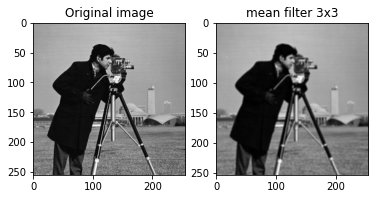

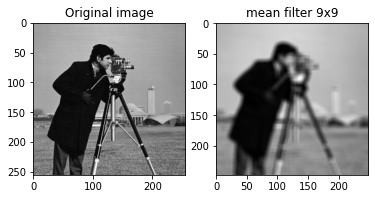

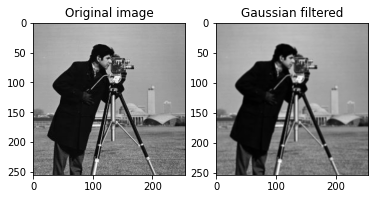

In [20]:
############################################################
# MEAN FILTER
############################################################

bias = np.asarray([0])
bias = bias.reshape((1, 1, 1, 1))

mean_filter_3 = np.ones(shape=(3, 3, 1, 1), dtype=np.float32)
mean_filter_3 = mean_filter_3/9.0

mean_filter_9 = np.ones(shape=(9, 9, 1, 1), dtype=np.float32)
mean_filter_9 = mean_filter_9/81.0

mean_3x3 = convolution(X, mean_filter_3, bias, pad=0, stride=1)
mean_9x9 = convolution(X, mean_filter_9, bias, pad=0, stride=1)

plt.figure(0)
plt.subplot(1, 2, 1)
plt.imshow(image[:, :, 0], cmap='gray')
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(mean_3x3[0, :, :, 0], cmap='gray')
plt.title('mean filter 3x3')

plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(image[:, :, 0], cmap='gray')
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(mean_9x9[0, :, :, 0], cmap='gray')
plt.title('mean filter 9x9')


############################################################
# GAUSSIAN FILTER
############################################################

gaussian_filter = np.asarray(
    [[1, 2, 1],
     [2, 4, 2],
     [1, 2, 1]],
     dtype=np.float32
)
gaussian_filter = gaussian_filter.reshape(3, 3, 1, 1)
gaussian_filter = gaussian_filter/16.0

gaussian_smoothed = convolution(X, gaussian_filter, bias, pad=0, stride=1)

plt.figure(3)
plt.subplot(1, 2, 1)
plt.imshow(image[:, :, 0], cmap='gray')
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(gaussian_smoothed[0,:,:,0], cmap='gray')
plt.title('Gaussian filtered')


__Optional__: Now load a color image and apply the mean filtering and Gaussian filtering on this color image.
Not much changes at the call of the convolution operation, you just need to "play" with the convolutional kernels configurations.

In [ ]:
# TODO your code here

### High pass filters 

On the other hand, high pass filters are used to highlight the high frequency information in an image (edges, abrupt changes in intensities).

One of the most commonly used high pass filters is the Sobel kernel (depicted below). These filters can be seen as discrete differentiation operators, and they compute an approximation of the gradient (on the horizontal or vertical direction) of the image intensity function.

<img src="https://i.ytimg.com/vi/W7OpxFbrD84/maxresdefault.jpg" width=300px/>

In [ ]:
sobel_horiz = np.asarray([[-1, 0, 1],
                          [-2, 0, 2], 
                          [-1, 0, 1]])

sobel_vert = sobel_horiz.T 

sobel_horiz = np.reshape(sobel_horiz, (3, 3, 1, 1))
sobel_vert = np.reshape(sobel_vert, (3, 3, 1, 1))

sobel_x = convolution(X, sobel_horiz, bias, 0, 1)
sobel_y = convolution(X, sobel_vert, bias, 0, 1)


plt.subplot(1, 3, 1)
plt.imshow(image[:, :, 0], cmap='gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.imshow(np.abs(sobel_x[0,:,:,0])/np.abs(np.max(sobel_x[0,:,:,0]))*255, cmap='gray')
plt.title('Sobel X')
plt.subplot(1, 3, 3)
plt.imshow(np.abs(sobel_y[0,:,:,0])/np.abs(np.max(sobel_y[0,:,:,0]))*255, cmap='gray')
plt.title('Sobel Y')
plt.tight_layout()


# Hello, _pytorch_!
 
Follow [this tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) to build your first convolutional neural network in a few lines of codes.
 
The main pipeline when training a neural network model is:
1. "Get one with the data". Analyze your input images, 
2. Define the model (don't be a hero in the beginning, start with something simple)
3. Define the training setup
4. Train the model
5. Test and **analyze** the results.
**Repeat the steps 2-5**
 
You will be using the CIFAR-10 dataset. The dataset comprises 60000 RGB-images with $32 \times 32$ image resolution, split into train (50000 images) and validation (10000 images) subsets.
The images of CIFAR-10 are divided into 10 classes: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. 
 
The main ideas you should take from this tutorial are the following:
 
## Datasets and data loaders
 
*Datasets* and *DataLoader* are the core pytorch data structures for interacting with your data. Ideally, you would want your data handling code to be completely decoupled from the model training and testing code (you'll often need to evaluate your model on different datasets).
 
torch.utils.data.Dataset stores the actual information about the dataset (the samples and their corresponding ground truth labels), while the torch.utils.data.DataLoader wraps an iterable around the dataset, allowing easy access to the data, automatic batching and multi-process data loading).
 
For now you'll use the CIFAR-10 data implementation from [torchvision](), but next time you'll be learning how you can create your own custom dataset.
torchvision is a popular package that comprises popular datasets, model architectures, and common image transformations for computer vision.
 
 
## Defining a model
 
You'll define your convolutional neural network by extending the [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) class, which is the base class for all the neural network modules. 
In the constructor, you define the layers (and their properties) that comprise your module.
 
Another important function that you need to override is the _forward()_ function in which you specify computation performed at every call (i.e. how are layers chained and how does the data flow over the computational graph). In other words, this defines the forward pass through your model.
 
## The training loop
 
Now, the interesting part is how you will learn the weights of your model based on the training data.
 
You first need to define a loss function and an optimizer. We'll cover optimizers next time, in this laboratory we'll just stick to stochastic gradient descent.
 
Let's first define some concepts:
- epoch: an epoch defines a pass through the entire training dataset. The number of epochs (passes of the entire training dataset the machine learning algorithm has completed) is a hyperparameter of your model. An epoch consists of one or more batches.
- batch:  a batch defines how many samples does your model "see" before updating its weights. In other words, the batch size is the number of samples that will be passed through to the network at one time during its training.
- sample: a sample is just a single training example.
 
A typical training loop looks like this:
```
 
optimizer - the chosen optimizer.it holds the current state of the model and will update the parameters based on the computed gradients. Notice that in the constructor of the optimizer you need to pass the parameters of your model and the learning rate.
criterion - the chosen loss function.
 
for epoch in range(num_epochs):  # num_epochs is a hyperparameter that specifies when is the training process iver
 
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0): # iterate over the dataset
        # get a batch of data (inputs and their corresponding labels)
        inputs, labels = data
 
        # IMPORTANT! set the gradients of the tensors to 0. by default torch accumulates the gradients on subsequent backward passes
        # if you omit this step, the gradient would be a combination of the old gradient, which you have already used to update the parameters
        optimizer.zero_grad()
 
        # perform the forward pass through the network
        outputs = net(inputs)
        
        # apply the loss function to determine how your model performed on this batch
        loss = criterion(outputs, labels)
  
        # start the backprop process. it will compute the gradient of the loss with respect to the graph leaves
        loss.backward()
 
  
        # update the model parameters by calling the step function 
        optimizer.step()
 
```

This was pretty easy!  
 
Now let's examine the effect of the learning rate over the training process.
In the tutorial, the training is performed with a fixed learning rate.
- First, create two plots: one in which you plot, for each epoch, the loss values on the training and the test data (two series on the same graph), and another one in which you plot, for each epoch, the accuracy values on the training and the test data.
- experiment with different values for the learning rate.
- then, experiment with a torch.optim.lr_scheduler to adjust the learning rate during the training process [doc](!https://pytorch.org/docs/stable/optim.html).
 
```
optimizer = SGD(model, 0.1)
scheduler = ExponentialLR(optimizer, gamma=0.9)
 
for epoch in range(num_epochs):
    for input, target in dataset:
        optimizer.zero_grad()
        output = model(input)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    # apply the learning rate scheduler 
    scheduler.step()
```
 
Plot the learning curves for all the training that you performed.
Fill in the table to compare the accuracy of your trained models.
 
| Model              | lr config            | accuracy  train| accuracy test |
| -----------        | -----------          | ------         | -----         |
| Cell11             | Cell12               |   Cell13       |               |
| Cell21             | Cell22               |   Cell23       |               |
 
You can work in teams and each team will train the model with a different setup.
 
[Funny loss curves](!https://lossfunctions.tumblr.com/)
 



## Writing a custom augmentation - cutout
 
In the tutorial, you might have noticed that the the input data is preprocessed:
 
```
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
 
```
 
Transforms are common image transformations available in the torchvision.transforms module. They can be chained together using *Compose*.
You can also use it to augment your data.
Image augmentation generates similar but distinct training examples after a series of random changes to the training images, and can help reduce overfitting.
 
In the last part of the laboratory you will implement a custom image augmentation layer, namely [_cutout_](https://arxiv.org/pdf/1708.04552.pdf). 
 
Cutout is a very simple augmentation that can boost your test accuracy with more than 1%. 
 
"_Cutout is a simple regularization technique for convolutional neural networks that involves removing contiguous
sections of input images, effectively augmenting the dataset
with partially occluded versions of existing samples. This
technique can be interpreted as an extension of dropout in
input space, but with a spatial prior applied, much in the
same way that CNNs apply a spatial prior to achieve improved performance over feed-forward networks on image
data._"
 
## Implementation details (text from the original cutout paper)
"_To implement cutout, we simply apply a fixed-size zero mask to a random location of each input image during each
epoch of training._
 
<img src="https://raw.githubusercontent.com/xkumiyu/numpy-data-augmentation/master/data/output/cutout.jpg" width=200px/>
 
_When cutout is applied to an image, we randomly select a pixel coordinate within the image
as a center point and then place the cutout mask around that
location. 
This method allows for the possibility that not all
parts of the cutout mask are contained within the image. Interestingly, we found that allowing portions of the patches
to lay outside the borders of the image (rather than constraining the entire patch to be within the image) was critical to achieving good performance._"
 
Write a _Cutout_ class. In the constructor you should pass the size for the applied mask, and in the _ _call__ method you should apply the cutout algorithm. 
 
Add it to the list of transforms from the tutorial:
```
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
 ````



Please take some time to complete this feedback [from](https://docs.google.com/forms/d/1MezmHGuHUh1B40gm2HZMR_HdFaXZrGne7QyBQJPKGmc/edit). Thanks!

# <font color='red'> Optional </font>  
## Pooling

The pooling layer is used to reduce the spatial dimension of the activation maps, and thus the computational burden. It has no learnable parameters and it operates individually across each input channel and resizes it spatially.

The two most common types of pooling are max pooling and average pooling.


The hyperparameters of a pooling layer are:
- the filter size F (usually this is an odd value);
- the stride S (or the step used when sliding across the input volume);

Given an input volume of shape  ($H_i$, $W_i$, $D$), the convolutional layer will produce an output of shape ($H_o$, $W_o$, $D$), where:

\begin{equation}
W_o = \frac{W_i - F}{S} + 1
\end{equation}

\begin{equation}
H_o = \frac{H_i - F}{S} + 1
\end{equation}

An illustration of the pooling operation is depicted in the image below:

![picture](https://www.researchgate.net/profile/Alla-Eddine-Guissous/publication/337336341/figure/fig15/AS:855841334898691@1581059883782/Example-for-the-max-pooling-and-the-average-pooling-with-a-filter-size-of-22-and-a.jpg)

In [ ]:
def pooling(X, filter_size, stride, type):
     """
    Implements the pooling operation
    
    :param X - input volume of shape (num_samples, H, W, C)
    :param filter_size - the size of the pooling
    :param stride - the stride of the pooling operation
    :param type - can be 'max' or 'avg'; the type of the pooling operation to apply
    
    Returns the output of the pooling operation.
    """
  # TODO your code here implement the pooling operation
  # you can inspire yourself from the convolution implementation on how to organize your code
  pass

# TODO your code here
# apply the pooling operation on a grayscale image and on a color image
# try different values for the stride and filter size. What do you observe?